<a href="https://colab.research.google.com/github/RoadoneP/Machine_learning/blob/main/Mnist/Mnist_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"road1p","key":"ff0b7d782f2cbc6008ce650fbd72ebce"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d oddrationale/mnist-in-csv

 33% 5.00M/15.2M [00:00<00:00, 24.9MB/s]
100% 15.2M/15.2M [00:00<00:00, 60.3MB/s]


In [6]:
!unzip mnist-in-csv.zip

Archive:  mnist-in-csv.zip
  inflating: mnist_test.csv          
  inflating: mnist_train.csv         


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.utils import np_utils

%matplotlib inline

In [55]:
df_train = pd.read_csv("mnist_train.csv")
df_test = pd.read_csv("mnist_test.csv")
df_train

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [56]:
X_t = df_train.drop(["label"],axis=1)
Y_t = df_train.label.values
X_test = df_test.drop(["label"],axis=1)
Y_test = df_test.label.values

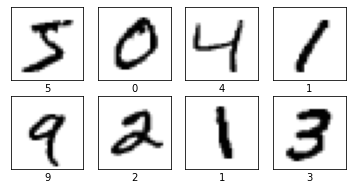

In [57]:
plt.figure(figsize=(6,3))
X = X_t.to_numpy().reshape(60000,28,28) #가로세로
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False) #격자
    plt.imshow(X[i], cmap=plt.cm.binary)
    plt.xlabel(str(Y_t[i]))
plt.show()
#grayscale=1 (60000,28,28,1(3이면 rgb))

In [58]:
X_train, X_val, Y_train, Y_val = train_test_split(X_t,Y_t,test_size=0.2,stratify = Y_t, random_state = 30)

In [59]:
Y_train.shape

(48000,)

In [60]:
num_classes = 10
X_train = X_train/255.
X_val = X_val/255.
X_test = X_test/255.

Y_train = keras.utils.np_utils.to_categorical(Y_train, num_classes)
Y_val = keras.utils.np_utils.to_categorical(Y_val, num_classes)
Y_test = keras.utils.np_utils.to_categorical(Y_test, num_classes)

In [61]:
col = 28
row = 28
input_shape = (col,row, 1)

In [62]:
X_train = X_train.to_numpy().reshape(48000, 28, 28, 1)
X_test = X_test.to_numpy().reshape(10000, 28, 28, 1)
X_val = X_val.to_numpy().reshape(12000, 28, 28, 1)

In [63]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(48000, 28, 28, 1)
(10000, 28, 28, 1)
(12000, 28, 28, 1)


#학습

In [85]:
model_f = Sequential([
    Flatten(input_shape=input_shape),
    Dense(128, activation='relu'),
    Dense(10,activation='softmax'),
])

model_f.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

In [86]:
hist_1 = model_f.fit(X_train, Y_train, batch_size=32, epochs=20, verbose=1, validation_data=(X_val, Y_val))

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3541 - accuracy: 0.0791 - val_loss: 2.2448 - val_accuracy: 0.1447
Epoch 2/20
1500/1500 [==============================] - 4s 2ms/step - loss: 2.2046 - accuracy: 0.1762 - val_loss: 2.1098 - val_accuracy: 0.2540
Epoch 3/20
1500/1500 [==============================] - 4s 2ms/step - loss: 2.0749 - accuracy: 0.2874 - val_loss: 1.9873 - val_accuracy: 0.3743
Epoch 4/20
1500/1500 [==============================] - 4s 2ms/step - loss: 1.9557 - accuracy: 0.4112 - val_loss: 1.8722 - val_accuracy: 0.4992
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 1.8423 - accuracy: 0.5277 - val_loss: 1.7631 - val_accuracy: 0.5848
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 1.7318 - accuracy: 0.5980 - val_loss: 1.6596 - val_accuracy: 0.6274
Epoch 7/20
1500/1500 [==============================] - 4s 2ms/step - loss: 1.6291 - accuracy: 0.6407 - val_loss: 1.5612 - val_accuracy:

In [87]:
hist_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

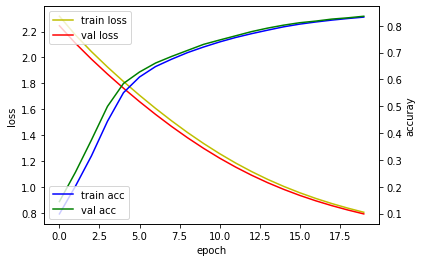

In [88]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist_1.history['loss'], 'y', label='train loss')
loss_ax.plot(hist_1.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist_1.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist_1.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [89]:
model_f.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.7701 - accuracy: 0.8391


[0.7701249122619629, 0.8391000032424927]

#CNN 학습

In [78]:
model = Sequential([
                   Conv2D(filters=32, kernel_size=3, activation='relu', padding='same', input_shape=input_shape),
                   Conv2D(filters=64, kernel_size=3, activation='relu', padding='valid'),
                   MaxPool2D(strides=(2,2)),
                   Dropout(0.5),

                   Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
                   Conv2D(filters=256, kernel_size=3, activation='relu', padding='valid'),
                   MaxPool2D(strides=(2,2)),
                   Dropout(0.5),

                   Flatten(),
                   Dense(units=256, activation='relu'),
                   Dropout(0.5),
                   Dense(units=100, activation='relu'),
                   Dropout(0.5),
                   Dense(units=10, activation='softmax'),
])
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [79]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 256)       295168    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 256)        

In [80]:
hist_2 = model.fit(X_train, Y_train, batch_size=32, epochs=20, verbose=1, validation_data=(X_val, Y_val))

Epoch 1/20
1500/1500 [==============================] - 40s 7ms/step - loss: 0.7124 - accuracy: 0.7596 - val_loss: 0.0659 - val_accuracy: 0.9820
Epoch 2/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1230 - accuracy: 0.9682 - val_loss: 0.0469 - val_accuracy: 0.9872
Epoch 3/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0923 - accuracy: 0.9760 - val_loss: 0.0381 - val_accuracy: 0.9893
Epoch 4/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0772 - accuracy: 0.9799 - val_loss: 0.0432 - val_accuracy: 0.9893
Epoch 5/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0690 - accuracy: 0.9820 - val_loss: 0.0405 - val_accuracy: 0.9890
Epoch 6/20
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0660 - accuracy: 0.9829 - val_loss: 0.0337 - val_accuracy: 0.9902
Epoch 7/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0564 - accuracy: 0.9855 - val_loss: 0.0332 - val_ac

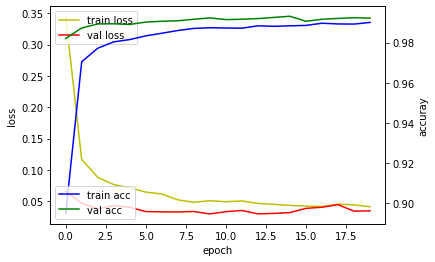

In [82]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist_2.history['loss'], 'y', label='train loss')
loss_ax.plot(hist_2.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist_2.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist_2.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [84]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0306 - accuracy: 0.9926


[0.030572744086384773, 0.9926000237464905]